In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import LabelEncoder
df = pd.read_csv('/content/data.csv')

In [5]:
df = df.drop(['id', 'Unnamed: 32'], axis=1)
label_encoder = LabelEncoder()
df['diagnosis'] = label_encoder.fit_transform(df['diagnosis'])
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
feature_importances = rf_classifier.feature_importances_

Accuracy: 0.9649122807017544


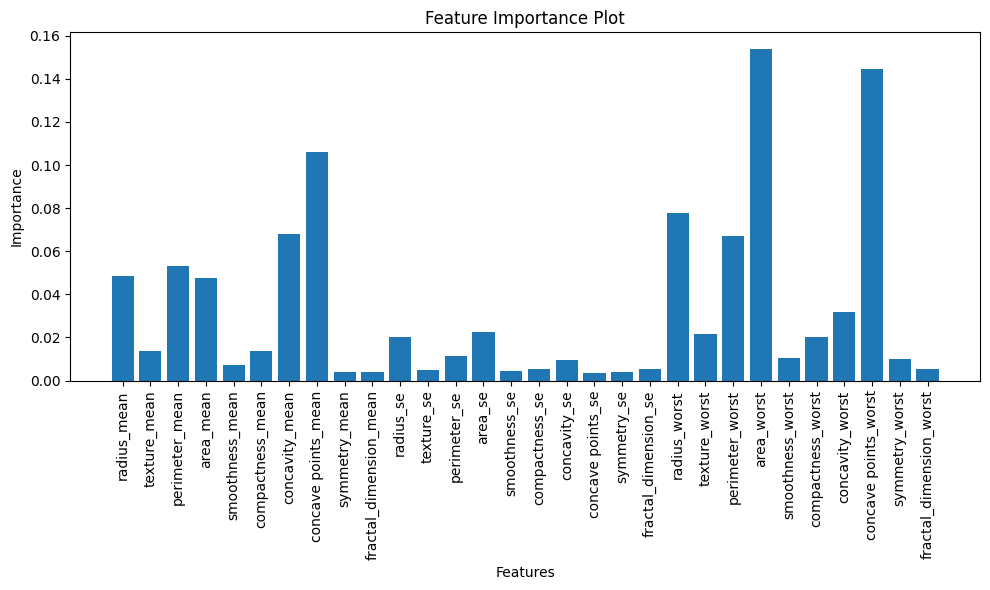

The most important feature is: area_worst


In [7]:
plt.figure(figsize=(10, 6))
plt.bar(X.columns, feature_importances)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance Plot')
plt.tight_layout()
plt.show()
most_important_feature = X.columns[np.argmax(feature_importances)]
print(f"The most important feature is: {most_important_feature}")